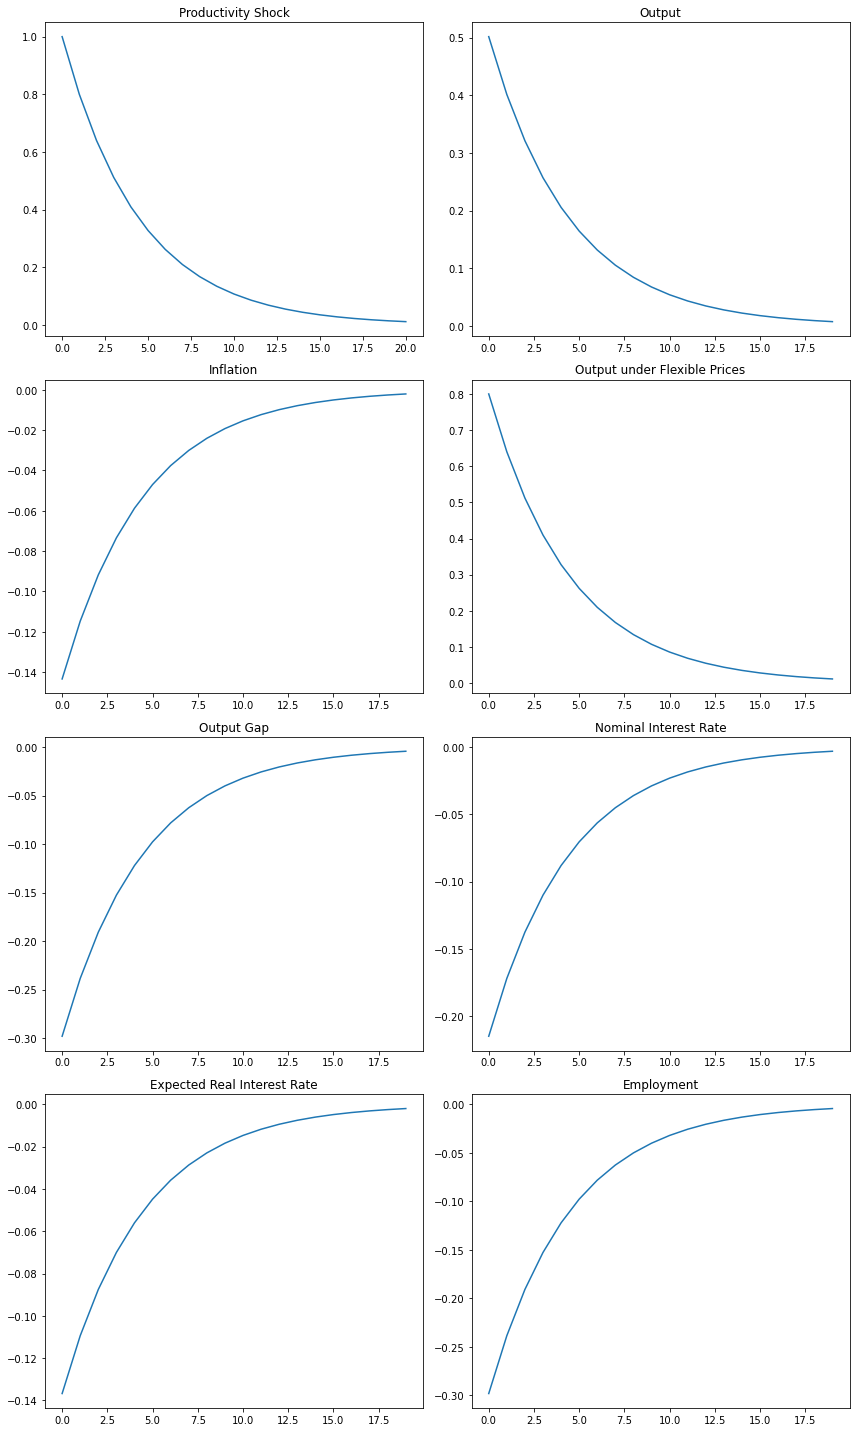

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Initialize parameters
beta = 0.99
sigma = 1
kappa = 0.1
rho = 0.8
phi = 1.5
gamma = 1

# Calculate intermediary variables
psi_a = 1 / ((1 - beta * rho) * (1 - rho) + kappa * sigma * (phi - rho))
psi_pi = -kappa * (1 - rho) * psi_a
psi_y = -kappa * sigma * (rho - phi) * psi_a

# Initialize lists for results
y = []
pi = []
yflex = []
y_yflex = []
i = []
er = []
n = []

# Set the initial value of productivity shock
initial_shock = 1
current_shock = initial_shock
a = [initial_shock]

# Loop to generate series
for t in range(20):
    next_shock = rho * current_shock
    a.append(next_shock)
    output = psi_y * next_shock
    y.append(output)
    inflation = psi_pi * next_shock
    pi.append(inflation)
    flexible_output = next_shock
    yflex.append(flexible_output)
    output_gap = output - flexible_output
    y_yflex.append(output_gap)
    interest_rate = phi * psi_pi * next_shock
    i.append(interest_rate)
    expected_real_interest_rate = (phi - 1) * (psi_pi - kappa * psi_y - kappa) * next_shock
    er.append(expected_real_interest_rate)
    employment = output - next_shock
    n.append(employment)
    current_shock = next_shock

# Plot the results
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
axes[0, 0].plot(a, label='a')
axes[0, 0].set_title('Productivity Shock')
axes[0, 1].plot(y, label='y')
axes[0, 1].set_title('Output')
axes[1, 0].plot(pi, label='pi')
axes[1, 0].set_title('Inflation')
axes[1, 1].plot(yflex, label='yflex')
axes[1, 1].set_title('Output under Flexible Prices')
axes[2, 0].plot(y_yflex, label='y_yflex')
axes[2, 0].set_title('Output Gap')
axes[2, 1].plot(i, label='i')
axes[2, 1].set_title('Nominal Interest Rate')
axes[3, 0].plot(er, label='er')
axes[3, 0].set_title('Expected Real Interest Rate')
axes[3, 1].plot(n, label='n')
axes[3, 1].set_title('Employment')

plt.tight_layout()

# Save the figure
plt.savefig('1_b.png')


plt.show()
